IMPORT DES LIBRAIRIES

In [300]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

IMPORT DES FICHIERS

In [301]:
customers = pd.read_csv('customers.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
transactions = pd.read_csv('transactions.csv', sep=';')

In [302]:
print(len(customers))
customers.head()

8621


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [303]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [304]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [305]:
df_transac_custom = pd.merge(transactions, customers, how = "inner", on="client_id")
print(len(df_transac_custom))
df_transac_custom.sort_values(['date']).head()

687534


,id_prod,date,session_id,client_id,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
63,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
180,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
518,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
757,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956


In [322]:
df_final = pd.merge(df_transac_custom, products, how = "inner", on="id_prod")
print(len(df_final))
df_final = df_final.sort_values(['date'])
df_final.reset_index(inplace=True, drop=True)
df_final.tail()

687534


,id_prod,date,session_id,client_id,sex,birth,price,categ
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,8.99,0
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,f,1981,4.52,0


INDICATEUR AUTOUR DU CHIFFRE D'AFFAIRE

In [307]:
df_CA_categ = df_final.groupby('categ')['price'].sum()
df_CA_categ.head()

categ
0    4419730.97
1    4827657.11
2    2780275.02
Name: price, dtype: float64

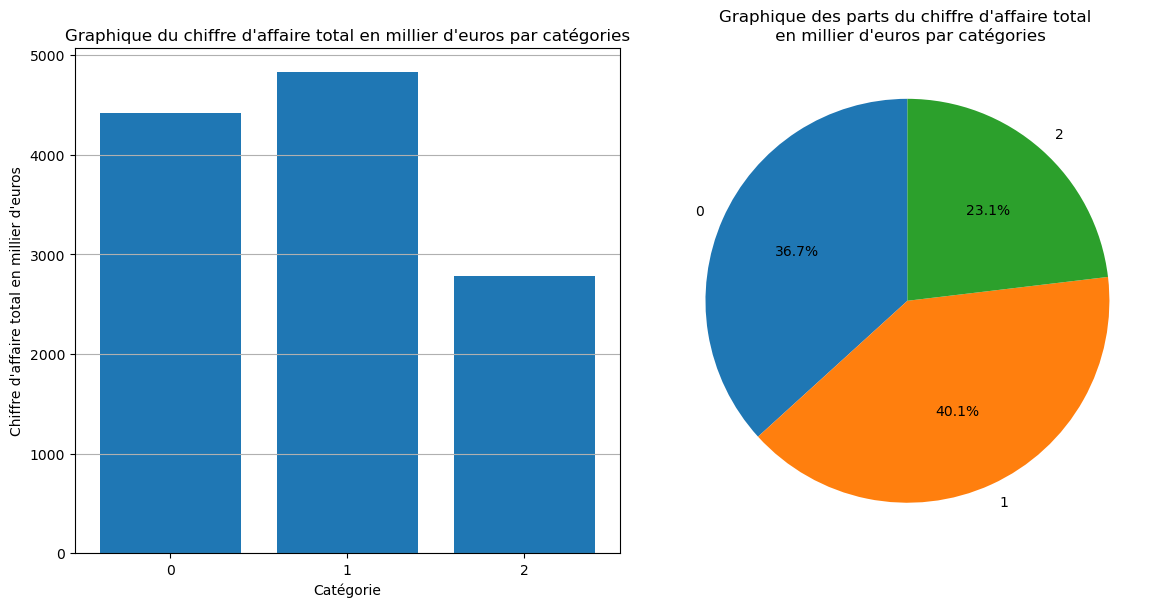

In [308]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.bar(df_CA_categ.index.astype(str), df_CA_categ/1000)
plt.grid(axis = "y")
plt.xlabel('Catégorie')
plt.ylabel("Chiffre d'affaire total en millier d'euros")
plt.title("Graphique du chiffre d'affaire total en millier d'euros par catégories")

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, premier graphique
plt.pie(df_CA_categ, labels=df_CA_categ.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total \n en millier d'euros par catégories")

plt.tight_layout()
plt.show()

In [309]:
df_CA_HF = df_final.groupby('sex')['price'].sum()
df_CA_HF.head()

sex
f    5950843.68
m    6076819.42
Name: price, dtype: float64

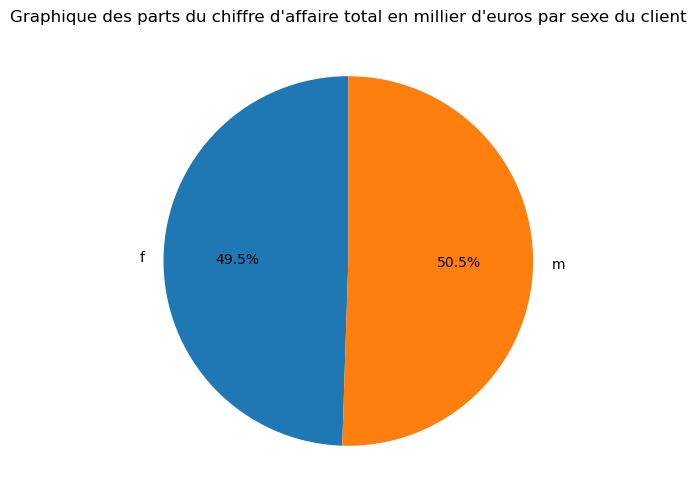

In [310]:
plt.figure(figsize=(10, 6))
plt.pie(df_CA_HF, labels=df_CA_HF.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total en millier d'euros par sexe du client")
plt.show()

In [311]:
# Grouper par 'client_id' et compter le nombre d'apparitions
comptage = df_final.groupby('client_id').size().reset_index(name='Nombre_Apparitions')
price_somme  = df_final.groupby('client_id')['price'].sum().reset_index(name='Total_Price')
df_CA_rec_client = pd.merge(comptage, price_somme, how = "inner", on="client_id")
df_CA_rec_client = df_CA_rec_client.sort_values('Nombre_Apparitions', ascending=True)

df_CA_rec_client.head()

,client_id,Nombre_Apparitions,Total_Price
3576,c_4223,1,24.81
4044,c_4648,1,11.20
8151,c_8351,1,6.31
694,c_1624,1,28.54
5868,c_6292,1,24.24


on enleve les valeurs au dessus de 5000 appartitions sinon le graphique est illisible

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


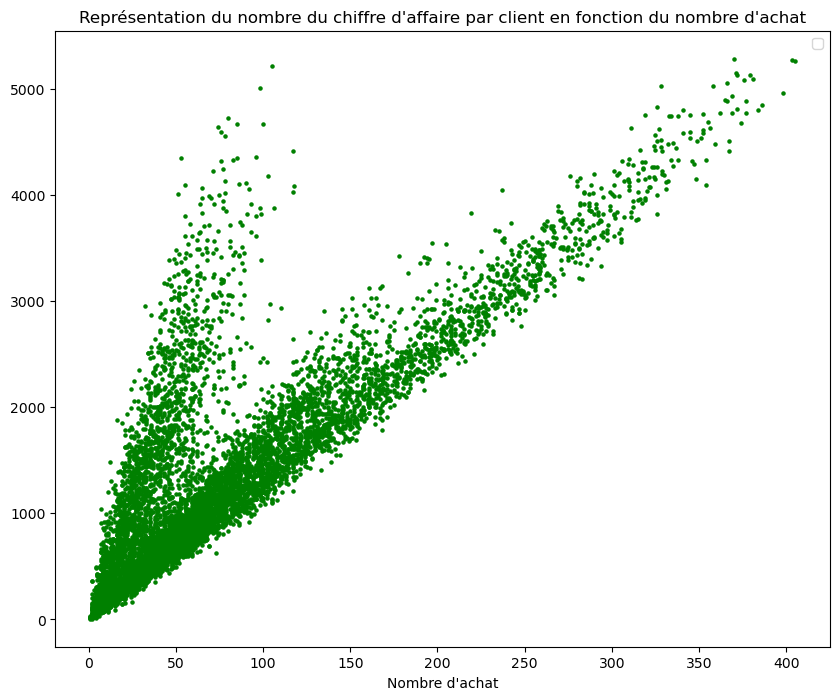

In [312]:
plt.figure(figsize=(10, 8))
plt.scatter(df_CA_rec_client['Nombre_Apparitions'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000], df_CA_rec_client['Total_Price'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000], marker="o", color = 'green', s= 5)
plt.xlabel('Nombre d\'achat')
plt.title('Représentation du nombre du chiffre d\'affaire par client en fonction du nombre d\'achat')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


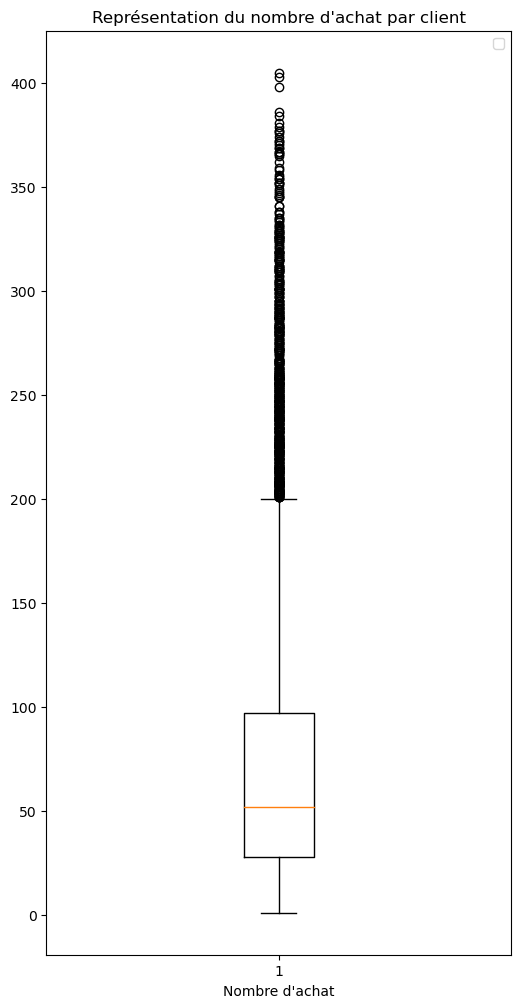

In [313]:
plt.figure(figsize=(6, 12))
plt.boxplot(df_CA_rec_client['Nombre_Apparitions'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000])
plt.xlabel('Nombre d\'achat')
plt.title('Représentation du nombre d\'achat par client')
plt.legend()
plt.show()

In [314]:
df_CA_rec_client.reset_index(inplace=True, drop=True)
df_CA_rec_client['Somme_Prix_Cumule'] = df_CA_rec_client['Total_Price'].cumsum()/df_CA_rec_client['Total_Price'].sum()*100
df_CA_rec_client['Nombre_Apparitions_prop'] = df_CA_rec_client['Nombre_Apparitions'].cumsum()/df_CA_rec_client['Nombre_Apparitions'].sum()*100
df_CA_rec_client['Part_Cumule_Client'] = df_CA_rec_client.index / max(df_CA_rec_client.index)*100
df_CA_rec_client_reduit = df_CA_rec_client.iloc[::int(max(df_CA_rec_client.index)/20)]
if df_CA_rec_client_reduit.index[-1] != df_CA_rec_client.index[-1]:
    df_CA_rec_client_reduit = pd.concat([df_CA_rec_client_reduit, df_CA_rec_client.iloc[[-1]]])
    df_CA_rec_client_reduit = df_CA_rec_client_reduit.drop(df_CA_rec_client_reduit.index[-2])
df_CA_rec_client_reduit.tail()

,client_id,Nombre_Apparitions,Total_Price,Somme_Prix_Cumule,Nombre_Apparitions_prop,Part_Cumule_Client
6864,c_5760,112,1409.32,55.717822,46.101138,79.823235
7293,c_6655,133,1729.90,62.341969,53.748178,84.812187
7722,c_4844,167,2151.12,69.930222,63.044446,89.801140
8151,c_6253,226,3040.52,79.164526,75.154683,94.790092
8599,c_1609,25586,326039.89,100.000000,100.000000,100.000000


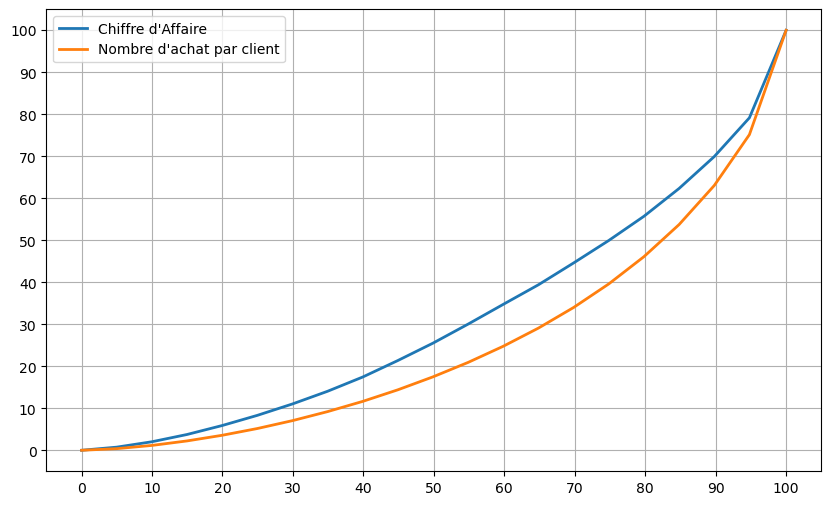

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(df_CA_rec_client_reduit['Part_Cumule_Client'], df_CA_rec_client_reduit['Somme_Prix_Cumule'], linewidth = 2, label="Chiffre d\'Affaire")
plt.plot(df_CA_rec_client_reduit['Part_Cumule_Client'], df_CA_rec_client_reduit['Nombre_Apparitions_prop'], linewidth = 2, label="Nombre d\'achat par client")
plt.grid(axis = "x")
plt.grid(axis = "y")
plt.xticks(np.arange(0, 100 + 0.01, step=10))
plt.yticks(np.arange(0, 100 + 0.01, step=10))
plt.legend()
plt.show()

In [316]:
df_final['date'] = pd.to_datetime(df_final['date'].str[:10])
df_final.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0


In [317]:
df_CA_day = pd.DataFrame(df_final.groupby('date')['price'].sum())
df_CA_day['mm14'] = df_CA_day.rolling(window=14).mean()

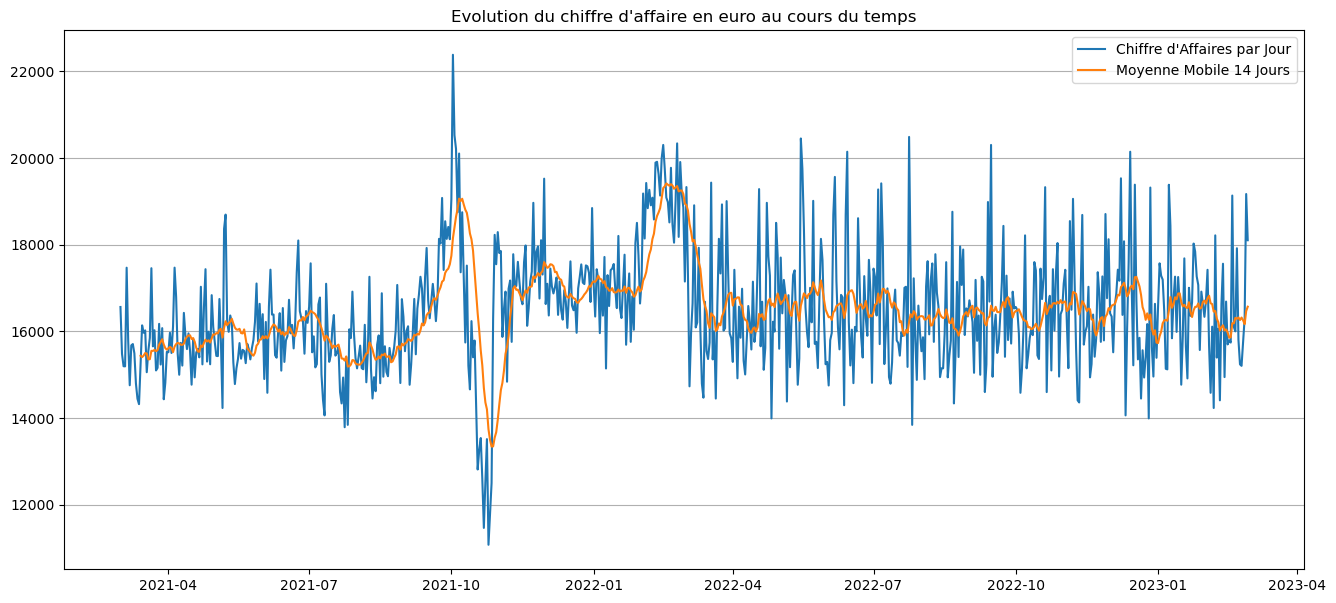

In [318]:
plt.figure(figsize=(16, 7))
plt.plot(df_CA_day.index, df_CA_day['price'], label='Chiffre d\'Affaires par Jour')
plt.plot(df_CA_day.index, df_CA_day['mm14'], label='Moyenne Mobile 14 Jours', linestyle='-')
plt.legend()
plt.grid(axis = "y")
plt.title("Evolution du chiffre d\'affaire en euro au cours du temps")
plt.show()

In [319]:
df_CA_annuel = df_final.copy()
df_CA_annuel['date'] = df_CA_annuel['date'].dt.year
df_CA_annuel = df_CA_annuel.groupby('date')['price'].sum()
df_CA_annuel.head()

date
2021    4944760.98
2022    6108681.81
2023     974220.31
Name: price, dtype: float64

on a des données jusqu'au 28 février 2023

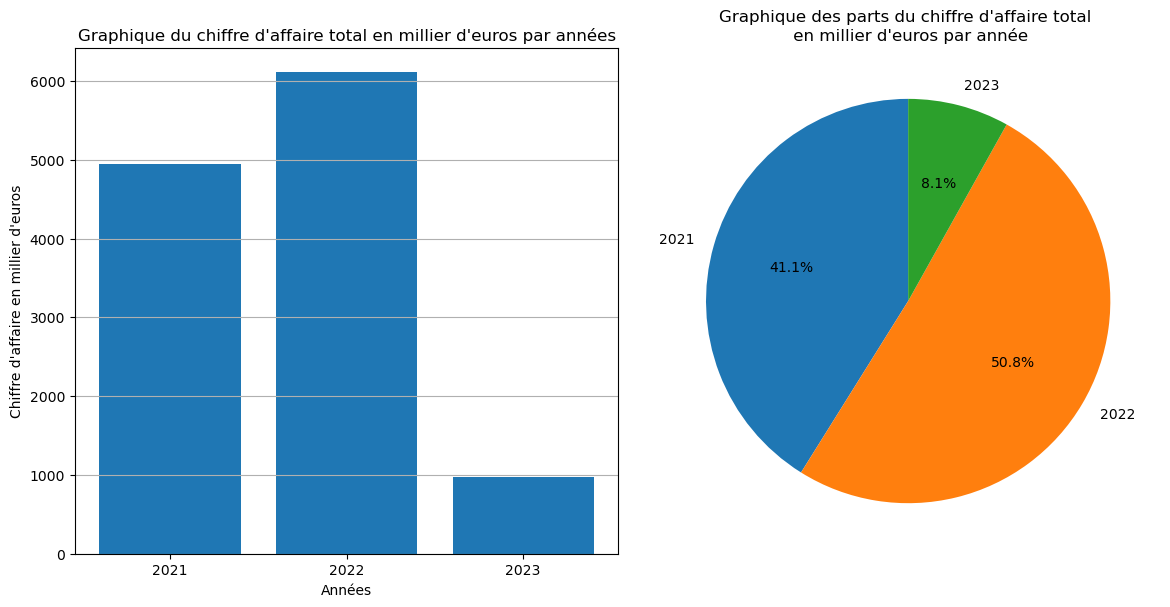

In [324]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.bar(df_CA_annuel.index.astype(str), df_CA_annuel/1000)
plt.grid(axis = "y")
plt.xlabel('Années')
plt.ylabel("Chiffre d'affaire en millier d'euros")
plt.title("Graphique du chiffre d'affaire total en millier d'euros par années")

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, premier graphique
plt.pie(df_CA_annuel, labels=df_CA_annuel.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total \n en millier d'euros par année")

plt.tight_layout()
plt.show()